In [1]:
# The term you are looking for to find the best choice of parameters when you have data values:
# supervised dimensionality reduction

%pylab inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.optimize as optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
matplotlib.__version__

'2.0.0rc1'

In [3]:
sys.path.insert(0, '../../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2 as f2
import gaussianprocessregression as gpr
import designofexperiment as doe
#import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(f2)
imp.reload(gpr)
imp.reload(doe)
#imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)

import constants
imp.reload(constants)
from constants import *

# Get saved training-set waveforms

In [42]:
trainset = ws.HDF5WaveformSet('../../data/TEOBv4_40hz/dh_train_corners_lhd.hdf5')
Bamp_filename = '../../data/TEOBv4_40hz/B_amp_corners_lhd.hdf5'
Bphase_filename = '../../data/TEOBv4_40hz/B_phase_corners_lhd.hdf5'
amp_gp_filename = '../../data/TEOBv4_40hz/gp_amp_corners_lhd.hdf5'
phase_gp_filename = '../../data/TEOBv4_40hz/gp_phase_corners_lhd.hdf5'

# trainset = ws.HDF5WaveformSet('../../data/TEOBv4_40hz/dh_train_lhd_test1.hdf5')
# Bamp_filename = '../../data/TEOBv4_40hz/B_amp_lhd_test1.hdf5'
# Bphase_filename = '../../data/TEOBv4_40hz/B_phase_lhd_test1.hdf5'
# amp_gp_filename = '../../data/TEOBv4_40hz/gp_amp_lhd_test1.hdf5'
# phase_gp_filename = '../../data/TEOBv4_40hz/gp_phase_lhd_test1.hdf5'

namp = 40
nphase = 40


# manually specify locations of interpolating nodes
# namp = 20
# nphase = 19
# h = trainset[0]
# amp_mfs = np.logspace(np.log10(h.x[0]), np.log10(h.x[-1]), namp)
# phase_mfs = np.logspace(np.log10(h.x[0]), np.log10(h.x[-1]), nphase+1)
# phase_mfs = np.delete(phase_mfs, 0)

# print trainset.parameters().shape
# print amp_mfs
# print phase_mfs

159


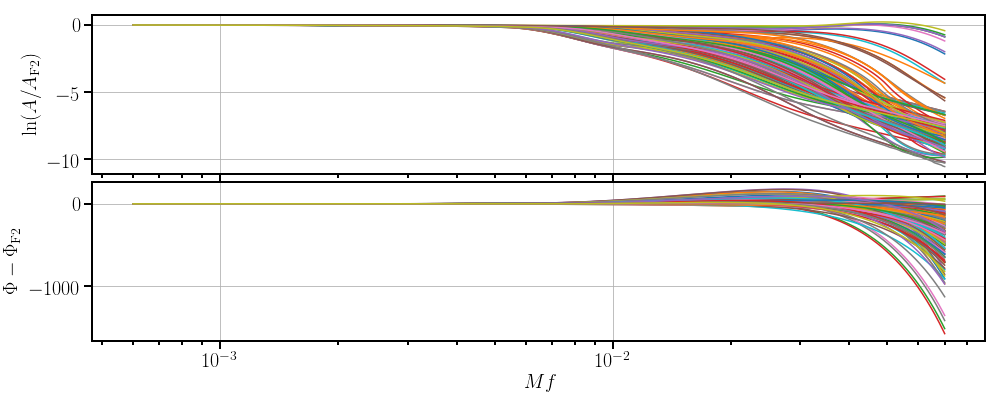

In [43]:
print len(trainset)

fig, (ax1, ax2) = wave.plot_waveforms_fd([trainset[i] for i in range(0, len(trainset), 1)])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate reduced Bases for amplitude and phase

In [46]:
epsilon = 1.0e-10

# Initialize the ReducedBasis object
add = surrogate.add_amp
subtract = surrogate.subtract_amp
scalar_multiply = surrogate.scalar_multiply_amp
inner_product = surrogate.inner_product_amp

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbamprun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbamprun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.885132288667
0.137191518127
0.027307073002
0.00639451791126
0.00279317772171
0.000797706968606
0.000371208675192
0.000221872438754
7.07436611612e-05
5.50402908365e-05
4.26513452902e-05
1.30073228455e-05
1.18153959828e-05
9.91119455407e-06
8.03204408539e-06
6.97014135231e-06
3.45699641313e-06
2.27079109261e-06
1.39436243063e-06
1.19096523443e-06
6.13116354908e-07
5.15458856265e-07
3.77404421159e-07
2.80509027895e-07
1.62876457543e-07
1.19087370964e-07
1.04495646469e-07
8.00726774886e-08
5.80806670536e-08
4.6957153832e-08
4.25090685985e-08
2.93837084664e-08
2.36528906461e-08
1.82810041549e-08
1.49289567375e-08
9.41602884552e-09
6.41565167658e-09
4.87226547996e-09
3.89075183183e-09
2.98965141532e-09
2.71776467997e-09
2.37739894438e-09
2.26362950606e-09
1.6738134212e-09
1.19432730372e-09
1.16425802332e-09
9.52150247535e-10
7.93533572185e-10
6.73183286892e-10
5.82687342821e-10
5.34045252465e-10
5.18493359358e-10
2.90883872545e-10
2.90656498869e-10
1.59489643714e-10
1.4503631629e-10
1.

59


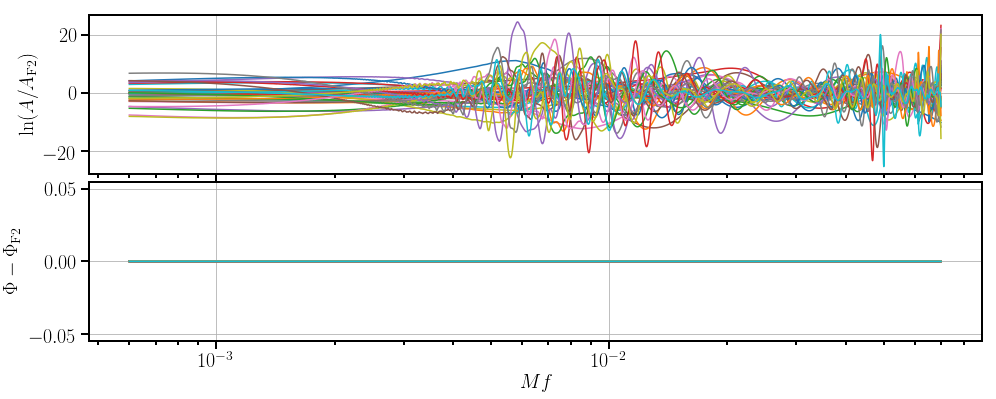

In [47]:
print len(rbamprun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbamprun.rb[:namp])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

In [48]:
epsilon = 1.0e-11

# Initialize the ReducedBasis object
add = surrogate.add_phase
subtract = surrogate.subtract_phase
scalar_multiply = surrogate.scalar_multiply_phase
inner_product = surrogate.inner_product_phase

get_waveform = trainset.get_waveform

ts_params = trainset.parameters()
rbphaserun = greedy.ReducedBasis(add, subtract, scalar_multiply, inner_product, get_waveform, ts_params)

# Standard method
rbphaserun.generate_reduced_basis(epsilon, ts_istart=0, Nbases=None)

1.0
0.998861284605
0.0332626514225
0.00142668960544
0.000671728586359
0.000255602831613
0.000173731227211
0.000116398826676
4.69149430655e-05
9.6732763909e-06
2.49174699207e-06
1.94182522073e-06
9.67350745174e-07
6.77125085669e-07
6.24883444988e-07
3.53523855301e-07
2.74931422517e-07
1.47562794872e-07
1.3504761609e-07
3.93261100351e-08
2.60564880783e-08
1.82217606559e-08
1.04588475658e-08
8.59672000253e-09
7.77052167056e-09
5.15881393159e-09
4.89949469884e-09
2.79657264013e-09
1.96013349996e-09
1.78859971278e-09
8.59278648235e-10
7.76175124173e-10
6.60178245404e-10
4.71216288211e-10
4.05408706605e-10
2.40962472198e-10
1.93426163975e-10
1.55067625407e-10
1.14602771717e-10
8.08919597972e-11
6.62642163363e-11
5.58678658891e-11
4.13236111996e-11
2.46975773166e-11
1.93053351083e-11
1.582400877e-11
1.22081234011e-11
1.13564713189e-11
7.4165118491e-12


49


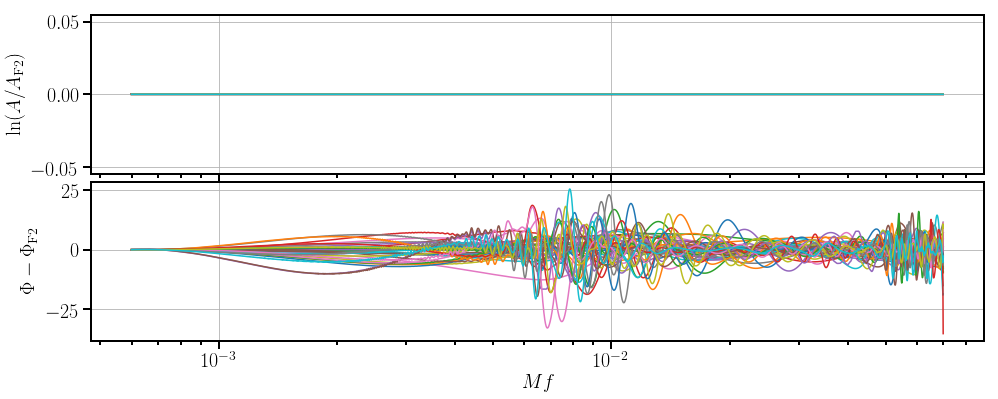

In [49]:
print len(rbphaserun.rb)

fig, (ax1, ax2) = wave.plot_waveforms_fd(rbphaserun.rb[:nphase])
ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Empirical interpolating functions

In [50]:
def save_empirical_interpolating_function_list(filename, b_j, mf_node):
    """Save the empirical interpolating functions as a HDF5WaveformSet object.
    The parameter value associated with each function b_j is the frequency of the node mf_j.
    
    Parameters
    ----------
    filename : string
    b_j : list of Waveform objects
        Empirical interpolating functions.
    mf_node : List of floats
        Frequency associated with each empirical interpolating function b_j.
    """
    bset = ws.HDF5WaveformSet(filename)
    
    for j in range(len(b_j)):
        # b_j don't have waveform parameters associated with them,
        # but you do want to save the node frequency node_mf 
        parameters = np.array([mf_node[j]])
        bset.set_waveform(j, b_j[j], parameters)
    
    bset.close()

In [51]:
# Make empirical interpolating functions

# Choose numerically optimal spacing
empirical_node_indices_amp, Bamp_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbamprun.rb[:namp], 'amp')
empirical_node_indices_phase, Bphase_j = surrogate.empirical_interpolation_for_time_domain_waveform(
    rbphaserun.rb[:nphase], 'phase')


# # Manually choose spacing
# empirical_node_indices_amp, Bamp_j = surrogate.empirical_interpolation_uniform_spacing(
#     rbamprun.rb[:namp], amp_mfs, 'amp')
# empirical_node_indices_phase, Bphase_j = surrogate.empirical_interpolation_uniform_spacing(
#     rbphaserun.rb[:nphase], phase_mfs, 'phase')

In [52]:
# Get the frequencies Mf at each empirical node, and sort B's by the node frequency.

# amp
mf_amp = Bamp_j[0].x[empirical_node_indices_amp]
mf_Bamp_list = [[mf_amp[i], Bamp_j[i]] for i in range(len(mf_amp))]
mf_Bamp_list_sorted = sorted(mf_Bamp_list, key=lambda x: x[0])

# phase
mf_phase = Bphase_j[0].x[empirical_node_indices_phase]
mf_Bphase_list = [[mf_phase[i], Bphase_j[i]] for i in range(len(mf_phase))]
mf_Bphase_list_sorted = sorted(mf_Bphase_list, key=lambda x: x[0])

In [53]:
# Save Amplitude and phase empirical interpolants

mf = [mf_Bamp_list_sorted[i][0] for i in range(len(mf_Bamp_list_sorted))]
B_j = [mf_Bamp_list_sorted[i][1] for i in range(len(mf_Bamp_list_sorted))]
save_empirical_interpolating_function_list(Bamp_filename, B_j, mf)

mf = [mf_Bphase_list_sorted[i][0] for i in range(len(mf_Bphase_list_sorted))]
B_j = [mf_Bphase_list_sorted[i][1] for i in range(len(mf_Bphase_list_sorted))]
save_empirical_interpolating_function_list(Bphase_filename, B_j, mf)

In [54]:
# Now load them
Bamp_j = ws.HDF5WaveformSet(Bamp_filename)
Bphase_j = ws.HDF5WaveformSet(Bphase_filename)

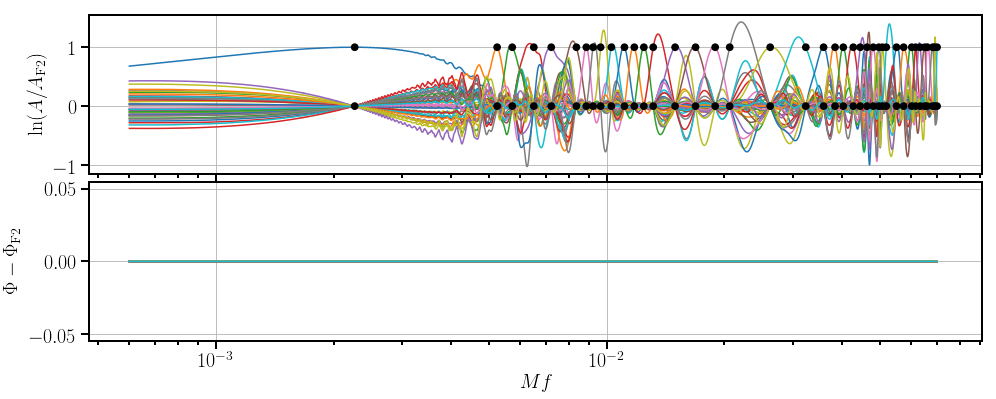

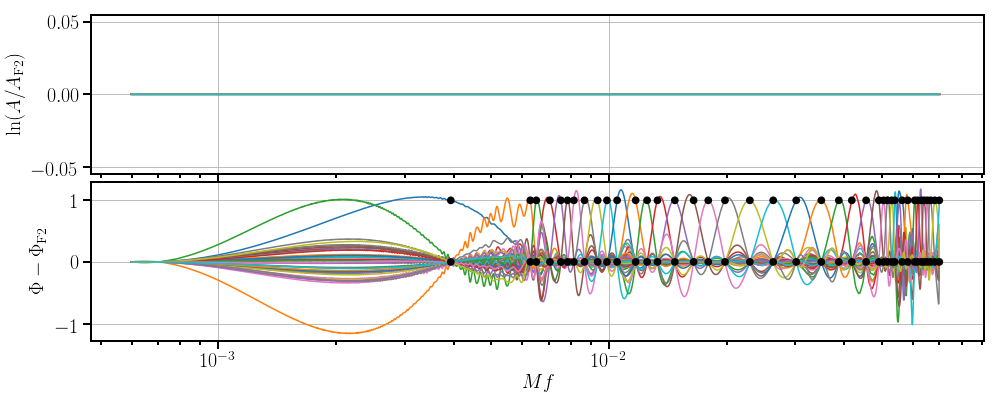

In [55]:
hs = [Bamp_j[j] for j in range(len(Bamp_j))]
mfs = np.array([Bamp_j.get_waveform(j, data='parameters')[0] for j in range(len(Bamp_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax1.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax1.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

hs = [Bphase_j[j] for j in range(len(Bphase_j))]
mfs = np.array([Bphase_j.get_waveform(j, data='parameters')[0] for j in range(len(Bphase_j))])
fig, (ax1, ax2) = wave.plot_waveforms_fd(hs)
# zorder is order in which figure is drawn (placed on top of previous figures)
ax2.scatter(mfs, 0*mfs, marker='o', c='k', s=60, edgecolor='none', zorder=100)
ax2.scatter(mfs, 0*mfs+1, marker='o', c='k', s=60, edgecolor='none', zorder=100)

ax1.set_ylabel(r'$\ln(A/A_{\rm F2})$')
ax2.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
ax2.set_xlabel(r'$Mf$')
ax1.grid()
ax2.grid()

# Generate Gaussian processes

In [56]:
# Calculate the amplitude for all waveforms in the training set
# at the amplitude empirical nodes
damp_ts_list = []
for j in range(len(Bamp_j)):
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    damp_ts = np.array([trainset[i].interpolate('amp')(mf) for i in range(len(trainset))])
    damp_ts_list.append(damp_ts)
    
# Calculate the phase for all waveforms in the training set
# at the phase empirical nodes
dphase_ts_list = []
for j in range(len(Bphase_j)):
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    dphase_ts = np.array([trainset[i].interpolate('phase')(mf) for i in range(len(trainset))])
    dphase_ts_list.append(dphase_ts)
    
# Relevant parameters for the training set waveforms
params_ts = trainset.parameters()

In [57]:
limits = np.array([[1.0/3.0, 1.0], [-0.5, 0.5], [-0.5, 0.5], [0, 5000], [0, 5000]])
kernel_type = 'matern52'

damp_gp_list = []
for i in range(len(damp_ts_list)):
    print i
    points = params_ts
    data = damp_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits)
    damp_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(damp_gp)
    damp_gp_list.append(damp_gp)

0
[  1.22896221e-02   1.57912351e+00   4.00000000e+00   4.00000000e+00
   2.00000000e+04   2.00000000e+04   5.68006951e-07]
1
[  4.90431238e-02   9.85353511e-01   4.00000000e+00   4.00000000e+00
   1.12790840e+04   2.00000000e+04   1.84208758e-06]
2
[  6.71816328e-02   7.72392891e-01   4.00000000e+00   4.00000000e+00
   6.23036205e+03   2.00000000e+04   2.48755611e-06]
3
[  1.15762431e-01   5.95717417e-01   4.00000000e+00   4.00000000e+00
   6.82415876e+03   2.00000000e+04   4.62007319e-06]
4
[  1.87320893e-01   6.96384322e-01   4.00000000e+00   4.00000000e+00
   6.65845888e+03   2.00000000e+04   7.26677937e-06]
5
[  3.41160531e-01   8.17990460e-01   4.00000000e+00   4.00000000e+00
   6.39645134e+03   2.00000000e+04   1.19976611e-05]
6
[  4.22698847e-01   8.63897211e-01   4.00000000e+00   4.00000000e+00
   6.16555862e+03   2.00000000e+04   1.38575069e-05]
7
[  4.96510278e-01   9.08836226e-01   4.00000000e+00   4.00000000e+00
   5.97478746e+03   2.00000000e+04   1.50618075e-05]
8
[  5.8

In [58]:
limits = np.array([[1.0/3.0, 1.0], [-0.5, 0.5], [-0.5, 0.5], [0, 5000], [0, 5000]])
kernel_type = 'matern52'

dphase_gp_list = []
for i in range(len(dphase_ts_list)):
    print i
    points = params_ts
    data = dphase_ts_list[i]
    hp0, hyper_limits = gpr.reasonable_hyperparameters_range(data, limits, length_scale_factor=[0.1, 10.0], 
                                                             sigma_n_factor=[1.0e-6, 0.1])
    #print hyper_limits
    dphase_gp = gpr.generate_gp(points, data, hp0, kernel_type=kernel_type, 
                                hyper_limits=hyper_limits, n_restarts_optimizer=9)
    
    print gpr.get_hyperparameters(dphase_gp)
    dphase_gp_list.append(dphase_gp)

0
[  3.52791687e+00   1.46861162e+00   2.93748817e+00   6.92667561e+00
   5.00000000e+04   5.00000000e+04   2.31876006e-06]
1
[  1.13687354e+01   1.40908366e+00   3.68948480e+00   8.88026707e+00
   2.83226352e+04   5.00000000e+04   8.26003145e-06]
2
[  1.29385636e+01   1.42873570e+00   3.77853092e+00   9.21935414e+00
   2.78831700e+04   5.00000000e+04   9.25348757e-06]
3
[  1.72548009e+01   1.41536820e+00   3.90002001e+00   9.82811336e+00
   2.32736922e+04   5.00000000e+04   1.23334507e-05]
4
[  1.86127165e+01   1.23230102e+00   4.05367147e+00   1.00000000e+01
   2.01092352e+04   5.00000000e+04   1.58272979e-05]
5
[  1.99216356e+01   1.19220783e+00   4.11419264e+00   1.00000000e+01
   1.92469309e+04   5.00000000e+04   1.84083058e-05]
6
[  2.16538014e+01   1.17994277e+00   4.14236499e+00   1.00000000e+01
   1.87491700e+04   5.00000000e+04   2.12369235e-05]
7
[  2.50272968e+01   1.17184039e+00   4.17528910e+00   1.00000000e+01
   1.79082387e+04   5.00000000e+04   2.66571428e-05]
8
[  2.9

In [59]:
# Save GPR functions
gpr.save_gaussian_process_regression_list(amp_gp_filename, damp_gp_list, 'matern52')
gpr.save_gaussian_process_regression_list(phase_gp_filename, dphase_gp_list, 'matern52')

# Diagnosing GP fit

In [ ]:
def symlog_yticks(axes):
    decade = np.array([0.1*i for i in range(10)])
    ticks = []
    for i in range(-1, 2):
        ticks.append(decade*10**i)
    ticks = np.concatenate(np.array(ticks))
    ticks_rev = np.flip(ticks, 0)
    all_ticks = np.concatenate((-ticks_rev, ticks)) 
    axes.set_yticks(all_ticks, minor=True)
    #axes.set_yticks(all_ticks)

In [ ]:
dh_testset_uni = ws.HDF5WaveformSet('../../data/TEOBv4_40hz/dh_test_1d.hdf5')

In [ ]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(damp_gp_list)):
    # Node frequency
    mf = Bamp_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    damp_test = np.array([dh_testset_uni[i].interpolate('amp')(mf) for i in range(len(dh_testset_uni))])
    damp_gp = damp_gp_list[j]
    damp_gp_eval, damp_gp_eval_err = damp_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], damp_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], damp_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], damp_gp_eval-damp_gp_eval_err, damp_gp_eval+damp_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_yscale('symlog', linthreshy=0.1)
#axes.set_yticks(ticks, minor=True)
symlog_yticks(axes)
axes.set_ylim(-3, 0.2)
axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\ln(A/A_{\rm F2})$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

In [ ]:
params_test = dh_testset_uni.parameters()
print params_test[0]

fig, axes = plt.subplots(1, figsize=(8, 6))
for j in range(len(dphase_gp_list)):
    # Node frequency
    mf = Bphase_j.get_waveform(j, data='parameters')[0]
    
    # Values at node mf for test set and GP prediction/error
    dphase_test = np.array([dh_testset_uni[i].interpolate('phase')(mf) for i in range(len(dh_testset_uni))])
    dphase_gp = dphase_gp_list[j]
    dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params_test, return_std=True)
    
    axes.plot(params_test[:, 1], dphase_test, 'o', ls='-', lw=1, ms=3,
             label='Node {}, $Mf=${:.5f}'.format(j, mf))
    axes.plot(params_test[:, 1], dphase_gp_eval, ls='-', lw=1, c='k')
    axes.fill_between(params_test[:, 1], dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, 
                      color='k', alpha=0.3)

axes.set_xlim(-0.7, 0.7)
axes.set_ylim()
axes.set_ylabel(r'$\Phi-\Phi_{\rm F2}$')
axes.set_xlabel(r'$S_{1z}$')
axes.legend(loc=(1.01, 0.2), ncol=2)

# Diagnostics (Everything below should go in separate notebooks)

# Plot frequency dependent error estimates

In [ ]:
# Bamp_filename = '../data/Bamp.hdf5'
# Bphase_filename = '../data/Bphase.hdf5'
# damp_gp_filename = '../data/amp_gp.hdf5'
# dphase_gp_filename = '../data/phase_gp.hdf5'

# Bamp = ws.HDF5WaveformSet(Bamp_filename)
# Bphase = ws.HDF5WaveformSet(Bphase_filename)
# damp_gp_list = gpr.load_gaussian_process_regression_list(damp_gp_filename)
# dphase_gp_list = gpr.load_gaussian_process_regression_list(dphase_gp_filename)

In [ ]:
def error_of_frequency(point, B_j, gp_list, data='amp'):
    jmax = len(B_j)
    eps_f_j = np.array([gp_list[j].predict(np.atleast_2d(point), return_std=True)[1][0] 
                        for j in range(jmax)])
    
    # Get complex version of B_j's in array form
    if data=='amp':
        B_j_array = np.array([B_j[j].amp for j in range(jmax)])
    elif data=='phase':
        B_j_array = np.array([B_j[j].phase for j in range(jmax)])
    else:
        raise Exception

    # Evaluate waveform
    error_arr = np.dot(eps_f_j, B_j_array)

    # Rewrite as TimeDomainWaveform
    xarr = B_j[0].x
    return xarr, error_arr

In [ ]:
point = np.array([0.8, 0.3, 0.7, 3455, 2579])
f, eps = error_of_frequency(point, Bamp, damp_gp_list, data='amp')
#f, eps = error_of_frequency(point, Bphase, dphase_gp_list, data='phase')

In [ ]:
fig, ax1 = plt.subplots(1, figsize=(16, 6))
ax1.plot(f, eps)
#ax1.set_xscale('log')
#ax1.set_xlim(1.0e-4, 0.1)

In [ ]:
#x2, x3, x4 = 0.0, 2000.0, 2000.0
#x0, x1, x2, x3, x4 = params_rand[i_phasemax]
x0, x1, x2, x3, x4 = 1.0/3.0, -0.7, -0.7, 0.0, 0.0
i = 2
mf = Bphase_j.get_waveform(i, data='parameters')[0]
print mf
gp = dphase_gp_list[i]

fig, ax = plt.subplots(2, figsize=(8, 6))
for x1 in np.linspace(-0.7, 0.7, 3):
    x0s = np.linspace(1.0/3.0, 1.0, 100)
    ps = np.array([[x0, x1, x2, x3, x4] for x0 in x0s])
    
    #true = np.array([func(p) for p in ps])
    #ax[0].plot(xs, true, label=r'$x_1$='+str(x1))
    
    y_pred, ysigma = gp.predict(ps, return_std=True)
    ax[0].plot(x0s, y_pred, c='k', ls='--', lw=2)
    ax[0].fill_between(x0s, y_pred-ysigma, y_pred+ysigma, color='k', alpha=0.3)
    
    #ax[1].plot(x0s, (y_pred-true), label=r'$x_1$='+str(x1))
    ax[1].fill_between(x0s, -ysigma, ysigma, color='k', alpha=0.3)

ax[0].set_ylabel(r'$f(\vec x)$')
ax[1].set_ylabel(r'$GP(\vec x)-f(\vec x)$')
ax[1].set_xlabel(r'$x_0$')
#ax[1].set_ylim(-0.1, 0.1)
ax[0].legend(bbox_to_anchor=(1.25, 1.05))
ax[1].legend(bbox_to_anchor=(1.25, 1.05))